# Evaluation
## 1. 성능 평가 지표 (Evaluation Metric)
- 분류
    - 회귀인 경우
        - 실제값과 예측값의 오차 평균값에 기반
    - 분류인 경우 
        - 정확도 (Accuracy)
        - 오차행렬 (Confusion Matrix)
        - 정밀도 (Precision)
        - 재현율 (Recall)
        - F1 스코어
        - ROC AUC

### (1) 정확도 (Accuracy)
```
정확도 = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수
```
- 실제 데이터에서 예측 데이터가 얼마나 같은지 판단
- 불균형한 label data set에서는 성능 수치로 사용되면 X
    - 데이터 분포도가 균일하지 않은 경우 정확도가 높은 수치가 나타날 수 있음 
- 한계점 극복을 다른 지표들과 함께 적용해야함

### (2) 오차 행렬 (Confusion Matrix)
- 학습된 분류모델이 예측을 수행하면서 얼마나 confused되는지 보여주는 지표
- 이진분류의 예측오류가 얼마인지
- 어떤 유형의 예측 오류가 발생하고 있는지 나타내는 지표
- Confusion_matrix() API제공
- 불균형한 dataset에서는 positive데이터 건수가 매우 작아서 Negative로 예측 정확도가 높아지는 경향 있음



### (3) 정밀도 (Precision) 와 재현률 (Recall) 
- 불균형한 dataset에서 더 선호되는 평가 지표
- Positive dataset의 예측 성능에 좀 더 초점 맞춘 평가 지표
- 이진분류 모델의 업무 특성에 따라 특정 평가 지표가 더 중요하게 간주
    - 재현률이 정밀도보다 상대적으로 중요한 업무가 더 많음 
- 가장 좋은 성능 평가는 재현율 & 정밀도 모두 높은 수치 가지는 것
<br>

</br>

#### 정밀도
```
정밀도 = TP / (FP + TP)
```
- 예측을 Positive로 한 대상 중에 예측과 실제값이 Positive로 일치한 데이터의 비율 의미
- Positive 예측 성능을 더 정밀하게 측정
- prcision_score() 사용
- Ex1 ) 스펨메일 여부 판단 모델
    - 실제 Positive인 것을 Negative로 판단하면 사용자가 불편함 느끼는 정도임
    - 반면 실제 Negative인 것을 Positive로 판단하면 메일을 아예 받지 못해서 업무에 차질 생김

#### 재현률 
```
재현률 = TP / (FN + TP)
```
- 실제값이 Positive인 대상 중 예측과 실제값이 Positive로 일치한 데이터의 비율 의미 
- 민감도 (Sensitivity) & TPR ( True Positive Rate)라고 불림 
- recall_score() 사용
- Ex1 ) 암판단 모델은 재현률이 더 중요!
    - 실제 Positive인 환자를 Negative로 판단하면 큰일남
    - 반면 Negative인 환자를 Positive로 판단하면 별 문제 없음
- Ex2 ) 금융 사기 적발 모델
    - 실제 Positive인 건을 Negative로 판단하면 손해가 커짐
    - 반면 Negative인 건을 Positive로 판단하면 재검증 절차만을 가짐

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [15]:
def get_clf_eval(y_test, pred):
    # 오차행렬
    confusion=confusion_matrix(y_test,pred)
    # 정확도
    accuracy=accuracy_score(y_test, pred)
    # 정밀도
    precision=precision_score(y_test, pred)
    # 재현률
    recall=recall_score(y_test,pred)
    print(confusion)
    print(accuracy,precision,recall)

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [17]:
# 원본 데이터 재로딩, 데이터 가공, 학습 데이터 / 테스트 데이터 분할
titanic=pd.read_csv('C:/Users/admin/dataset/titanic_train.csv')

In [18]:
# null처리
def fillnan(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

In [19]:
# 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name', 'Ticket'], axis=1,inplace=True)
    return df

In [20]:
# Label Encoding 수행
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features=['Cabin', 'Sex','Embarked']
    for f in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(df[f])
        df[f]=le.transform(df[f])
    return df

In [21]:
# 앞에서 설정한 데이터 전처리 함수 호출( 전체 )
def transform_features(df):
    df=fillnan(df)
    df=drop_features(df)
    df=format_features(df)
    return df

In [22]:
y_df=titanic['Survived']
x_df=titanic.drop('Survived', axis=1)
x_df=transform_features(x_df)

In [23]:
X_train,X_test, y_train,y_test=train_test_split(x_df,y_df, test_size=0.20, random_state=11)

In [24]:
lrclf=LogisticRegression()

In [25]:
lrclf.fit(X_train, y_train)
pred=lrclf.predict(X_test)
get_clf_eval(y_test,pred)

[[108  10]
 [ 14  47]]
0.8659217877094972 0.8245614035087719 0.7704918032786885
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Result
```
오차행렬 => [[108  10]
             [ 14  47]]
정확도 => 0.8659217877094972 
정밀도 => 0.8245614035087719 
재현율 => 0.7704918032786885
```
정밀도에 비해 낮은 재현율 가짐

#### 정밀도 / 재현율 트레이드 오프 (Trade-off)
- 업무 특성상 정밀도 & 재현률이 강조되어야 하는 경우에 분류의 결정 임계값(Threshold) 조정해야함
- 정밀도 & 재현율은 상호보완적이기 때문에 하나를 높이면 다른 하나는 떨어짐
- 이를 정밀도 /재현율의 트레이드오프(Trade-off)라 함



### predict_proba()
- 개별 데이터별로 예측 확률을 반환 
- 학습이 완료된 Classifier 객체에서 호출 가능
- test feature 데이터 세트를 파라미터로 입력해주면 test feature 레코드의 개별 클래스 예측 확률을 반환
- ndarray형식으로 반환
    - 1st column : class값 0에 대한 예측 확률
    - 2nd column : class값 1에 대한 예측 확률

In [27]:
# LogisticRegression 객체에서 predict_proba() 메서드를 수행한 뒤 반환 값을 확인
pred_proba= lrclf.predict_proba(X_test)
pred=lrclf.predict(X_test)

In [28]:
# 결과 shape
pred_proba.shape

(179, 2)

In [30]:
# 앞 3개만 샘플로 추출
pred_proba[:3]

array([[0.44935226, 0.55064774],
       [0.86335512, 0.13664488],
       [0.86429644, 0.13570356]])

In [32]:
# 예측 확률 arr와 예측 결괏값 arr을 concatenate해서 보기
import numpy as np
pred_proba_result=np.concatenate([pred_proba,pred.reshape(-1,1)], axis=1)

In [34]:
# 2개의 class 중 더 큰 확률을 class값으로 예측 
pred_proba_result[:3]

array([[0.44935226, 0.55064774, 1.        ],
       [0.86335512, 0.13664488, 0.        ],
       [0.86429644, 0.13570356, 0.        ]])

### Result
- arr 0,1 두개의 column중에서 더 큰 확률 값으로 최종 예측 

## (3) F1 스코어
- 정밀도 & 재현율 결합한 지표 
- 정밀도 & 재현율이 한쪽으로 치우치지 않는 수치를 나타낼때 높은 값을 가짐
- f1_score() API 제공

#### 로지스틱 회귀 기반의 타이타닉 생존자 모델의 F1스코어 구하기

In [36]:
from sklearn.metrics import f1_score
f1=f1_score(y_test, pred)
print('F1 score : ' , f1)

F1 score :  0.7966101694915254


## (4) ROC 곡선 & AUC
### i. AUC Score
- 이진분류의 예측 성능 측정에 사용되는 지표



### ii. ROC 곡선 (ROC Curve)
- 머신러닝의 이진 분류 모델의 예측 성능 판단
- FPR (False Positive Rate)이 변할 때 TPR(True Positive Rate: 재현율)가 어떻게 변하는지 나타냄
- roc_curve() API 제공
- ROC 곡선
    - 가운데 직선 : ROC 곡선의 최저값 의미
    - ROC 곡선이 가운데 직선에 가까울수록 성능이 떨어짐
    - ROC 곡선이 가운데 직선에서 멀어질수록 성능이 뛰어남

#### roc_curve() 이용해 타이타닉 생존자 예측 모델의 FPR , TPR, 임곗값 구하기
- predict_proba() 결과 다시 이용해서 roc_curve() 결과 도출

In [38]:
from sklearn.metrics import roc_curve

In [39]:
# label값이 1일때의 예측 확률 추출
pred_proba_class1=lrclf.predict_proba(X_test)[:,1]

In [40]:
fprs,tprs,thresholds=roc_curve(y_test,pred_proba_class1)

In [41]:
# 반환된 임계값 배열에서 샘플로 데이터 추출, 임곗값 5step으로 추출
# thresholds[0] 은 max(예측확률)+1로 임의 설정, 
thr_idx=np.arange(1,thresholds.shape[0],5)

In [43]:
print('sample 추출 위한 임곗값 배열의 idx :', thr_idx)
print('sample idx로 추출한 임계값', np.round(thresholds[thr_idx],2))

sample 추출 위한 임곗값 배열의 idx : [ 1  6 11 16 21 26 31 36 41 46]
sample idx로 추출한 임계값 [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]


In [45]:
print('sample 임곗값 별 FPR', np.round(fprs[thr_idx],3))
print('sample 임곗값 별 TPR', np.round(tprs[thr_idx],3))

sample 임곗값 별 FPR [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
sample 임곗값 별 TPR [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


### Result
- 임곗값이 1에 가까운 값에서 점점 작아지면서 FPR이 커짐
- FPR이 조금씩 커질때 TPR은 가파르게 커짐 

### FPR 변화에 따른 TPR의 변화를 ROC 곡선으로 시각화

In [49]:
import matplotlib.pyplot as plt
def roc_curve_plot(y_test,pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 반환
    fprs,tprs,thresholds=roc_curve(y_test,pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs,tprs,label='ROC')
    # 가운데 대각선 (최저값) 그리기
    plt.plot([0,1],[0,1],'k--', label='Random')

    # FPR X축의 Scale을 0,1단위로 변경하기
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR( Recall)')
    plt.legend()

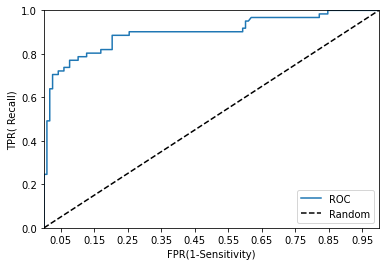

In [50]:
roc_curve_plot(y_test,pred_proba[:,1])

### Result
- AUC 값을 분류의 성능지표로 사용함
- AUC (Area Under Curve)
    - ROC 곡선 밑의 면적 구한 것
    - 1에 가까울수록 좋은 수치
    - 수치가 커지려면 FPR이 작은 상태에서 TPR이 얼마나 커질수 있는지가 관건
    - 대각선 직선의 AUC값 : 0.5
    - 보통의 분류는 0.5이상의 값을 가짐

In [52]:
from sklearn.metrics import roc_auc_score

pred_proba=lrclf.predict_proba(X_test)[:,1]
# AUC 구하기
roc_score=roc_auc_score(y_test, pred_proba)
print('ROC AUC값', roc_score)

ROC AUC값 0.8986524034454015
